<a href="https://colab.research.google.com/github/shubhangi0301/Rain-Prediction-in-Australia/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li>Instructions</li>
    <li>About the Data</li>
    <li>Importing Data </li>
    <li>Data Preprocessing </li>
    <li>One Hot Encoding </li>
    <li>Train and Test Data Split </li>
    <li>Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</li>
</li>
</div>
</div>



# Instructions



We will use some of the algorithms taught in the project, specifically:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score



# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**


In [67]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [69]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [70]:
df.shape

(3271, 22)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

Count the number of missing values (NaN or None) in each column

In [72]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Finding the Correlation between parameters

In [73]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028,0.939307,0.753147
MaxTemp,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217,0.858639,0.960805
Rainfall,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999,-0.054297,-0.142748
Evaporation,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422,0.606122,0.474599
Sunshine,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861,0.113891,0.345528
WindGustSpeed,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016,0.159570,0.036216
WindSpeed9am,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030,-0.334084,-0.351836
WindSpeed3pm,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435,0.280009,0.136713
Humidity9am,0.053946,-0.185382,0.332636,-0.395651,-0.490631,-0.225613,-0.189763,-0.288910,1.000000,0.657933,0.262098,0.249202,0.431550,0.331062,-0.145944,-0.155192
Humidity3pm,0.273269,-0.150741,0.305635,-0.102295,-0.586476,-0.095037,-0.148849,-0.135039,0.657933,1.000000,0.151608,0.179611,0.463529,0.472248,0.131855,-0.212696


Visualising correlation by plotting Heatmap

<Axes: >

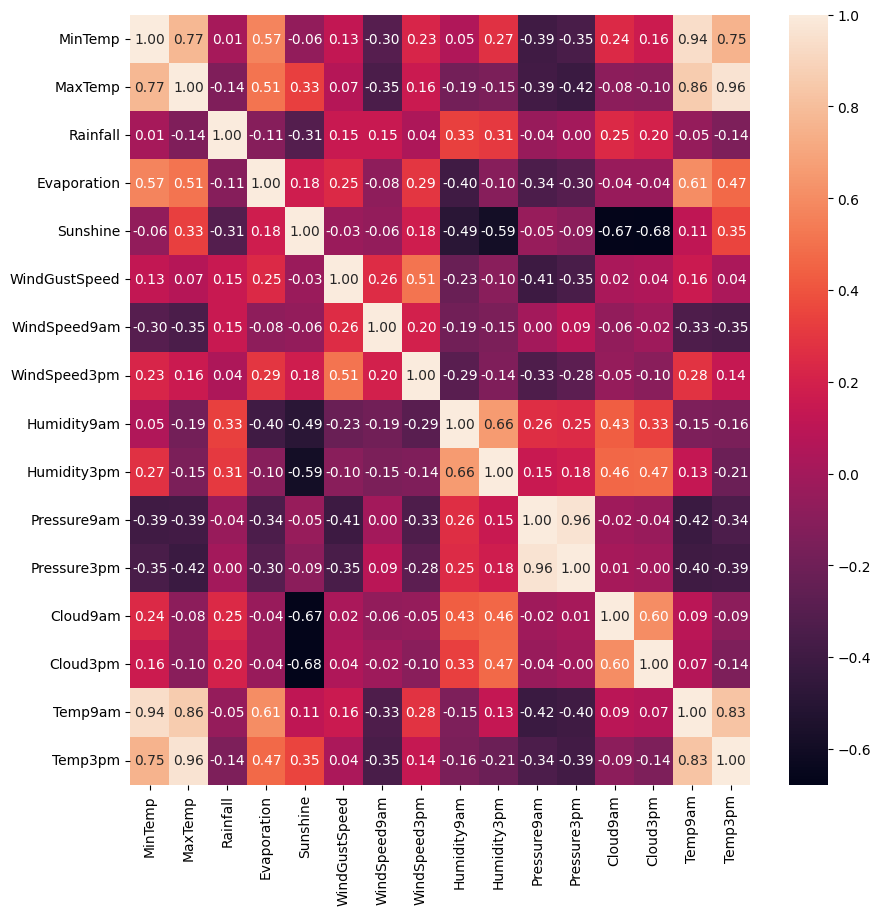

In [74]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.
We will use pandas **get_dummies()** method for this.


In [75]:
df_proc = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [76]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainTomorrow']]

,Date,RainTomorrow
0,2/1/2008,1
1,2/2/2008,1
2,2/3/2008,1
3,2/4/2008,1
4,2/5/2008,1
...,...,...
3266,6/21/2017,0
3267,6/22/2017,0
3268,6/23/2017,0
3269,6/24/2017,0


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [77]:
df_proc.drop('Date',axis=1,inplace=True)

In [78]:
df_proc = df_proc.astype(float)

We need to predict if the rain will fall or not. So we choose the RainTomorrow column as the target.

In [79]:
features = df_proc.drop(columns='RainTomorrow', axis=1)
Y = df_proc['RainTomorrow']

### Linear Regression


Using the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 10

In [80]:
x_train, x_test, y_train, y_test = train_test_split(features,Y, test_size=0.2,random_state=10)

Creating and training a Linear Regression model called **LinearReg** using the training data

In [81]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

 Predicting outcomes based on test features

In [82]:
predictions = LinearReg.predict(x_test)

Using the predicted data and the testing data, calculating the value for each metric using the appropriate function.

In [83]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)
print('Linear Regression MAE: ', LinearRegression_MAE)
print('Linear Regression MSE: ', LinearRegression_MSE)
print('Linear Regression R2: ', LinearRegression_R2)

Linear Regression MAE:  0.2563092413749404
Linear Regression MSE:  0.11571947414932758
Linear Regression R2:  -0.3842523858564404


Showing the MAE, MSE, and R2 in a tabular format

In [84]:
Report = {'MSE': [LinearRegression_MSE], 'MAE': [LinearRegression_MAE], 'R2': [LinearRegression_R2]}
Report=pd.DataFrame(Report)
Report.index = ['Linear Regression']
Report

,MSE,MAE,R2
Linear Regression,0.115719,0.256309,-0.384252


### KNN


Creating and training a KNN model called **KNN** using the training data with the n_neighbors parameter set to 4

In [85]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

 Predicting outcomes based on test features

In [86]:
predictions = KNN.predict(x_test)

Using the predicted data and the testing data, calculating the value for each metric using the appropriate function.

In [87]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
KNN_F1_Score = f1_score(y_test, predictions, average='weighted')
print('KNN Accuracy Score: ', KNN_Accuracy_Score)
print('KNN Jaccard Index: ', KNN_JaccardIndex)
print('KNN F1 Score: ', KNN_F1_Score)

KNN Accuracy Score:  0.8183206106870229
KNN Jaccard Index:  0.7901234567901234
KNN F1 Score:  0.802374933635524


### Decision Tree


Creating and training a Decision Tree model called **Tree** using the training data

In [88]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

 Predicting outcomes based on test features

In [89]:
predictions = Tree.predict(x_test)

Using the predicted data and the testing data, calculating the value for each metric using the appropriate function.

In [90]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(y_test, predictions)
print('Tree Accuracy Score: ', Tree_Accuracy_Score)
print('Tree Jaccard Index: ', Tree_JaccardIndex)
print('Tree F1 Score: ', Tree_F1_Score)

Tree Accuracy Score:  0.7954198473282442
Tree Jaccard Index:  0.7602862254025045
Tree F1 Score:  0.5889570552147239


### Logistic Regression


In [91]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

Creating and training a LogisticRegression model called **LR** using the training data with the solver parameter set to liblinear

In [92]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

 Predicting outcomes based on test features

In [93]:
predictions = LR.predict(x_test)

Using the predicted data and the testing data, calculating the value for each metric using the appropriate function.

In [94]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))
print('LR Accuracy Score: ', LR_Accuracy_Score)
print('LR Jaccard Index: ', LR_JaccardIndex)
print('LR F1 Score: ', LR_F1_Score)
print('LR Log Loss: ', LR_Log_Loss)

LR Accuracy Score:  0.8366412213740458
LR Jaccard Index:  0.8033088235294118
LR F1 Score:  0.6747720364741641
LR Log Loss:  0.3812590636097066


### SVM


Creating and training a SVM model called **SVM** using the training data

In [95]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

 Predicting outcomes based on test features

In [96]:
predictions = SVM.predict(x_test)

Using the predicted data and the testing data, calculating the value for each metric using the appropriate function.

In [97]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)

SVM Accuracy Score:  0.8458015267175573
SVM Jaccard Index:  0.8126159554730983
SVM F1 Score:  0.6966966966966968


### Report


**Showing the Accuracy,Jaccard Index, F1-Score and LogLoss in a tabular format using data frame for all of the above models.**

*LogLoss is only for Logistic Regression Model

In [98]:
Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree',  'LogisticRegression','SVM'],
          'Accuracy Score': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
          'Jaccard Score': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
          'F1-score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
          'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,Jaccard Score,F1-score,LogLoss
0,"KNN, K=4",0.818321,0.790123,0.802375,N/A
1,Decision Tree,0.795420,0.760286,0.588957,N/A
2,LogisticRegression,0.836641,0.803309,0.674772,0.381259
3,SVM,0.845802,0.812616,0.696697,N/A


from matplotlib import pyplot as plt
Report['Accuracy Score'].plot(kind='hist', bins=20, title='Accuracy Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report['Jaccard Score'].plot(kind='hist', bins=20, title='Jaccard Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Report.groupby('Classification Algorithm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Report.groupby('LogLoss').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report.plot(kind='scatter', x='Accuracy Score', y='Jaccard Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report.plot(kind='scatter', x='Jaccard Score', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Report['Accuracy Score'].plot(kind='line', figsize=(8, 4), title='Accuracy Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Report['Jaccard Score'].plot(kind='line', figsize=(8, 4), title='Jaccard Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Report['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LogLoss'].value_counts()
    for x_label, grp in Report.groupby('Classification Algorithm')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Classification Algorithm')
_ = plt.ylabel('LogLoss')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['Classification Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Accuracy Score', y='Classification Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['LogLoss'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Accuracy Score', y='LogLoss', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['Classification Algorithm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Jaccard Score', y='Classification Algorithm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Report['LogLoss'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Report, x='Jaccard Score', y='LogLoss', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [99]:
import plotly.express as px

In [100]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['LogLoss'], name='LogLoss'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()